In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics
from math import sqrt

df = pd.read_csv('result.csv')
df = df.fillna(0)
region = df.region_name.unique()
def split_region(i):
    val_state = np.array([region[3*i], region[3*i+1], region[3*i+2]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

def cross_val(neigh,typ):
    score_list_cv = []
    
    if typ == "region":
        for i in range(0,5):
            train, val = split_region(i)
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
    
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return min(score_list_cv)
    
    elif typ == "time":
            # if i == 0:
            train = df.loc[df['date'] < '2020-08-10']
            val = df.loc[df['date'] >= '2020-08-10']
            # else:
                # train = df.loc[df['date'] >= '2020-08-10']
                # val = df.loc[df['date'] < '2020-08-10']
            
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
        
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
            return min(score_list_cv)     
    return 0


In [2]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k),"region"))


In [3]:
print(min(score_list))
print(score_list)

33.322331517734135
[34.28815798169651, 33.322331517734135, 46.46996906273296, 44.73426166448561, 48.666410958232326, 48.80037757898859, 50.48328341898836, 51.93562722255311, 52.254775774285456, 53.51863745981913, 54.02209611526444, 52.160716587660794, 50.25035612409419, 50.357685463698296, 49.80816879802294, 50.27053158149525, 49.40058619273745, 48.38985059497049, 47.41506929819659, 46.37706718962629, 46.15005649822782, 46.1276022929504, 45.70254823698475, 45.29472757042493, 44.948514349444544, 44.99953173837747, 44.53665691170139, 44.25488686391446, 43.793649195622, 43.83794568044311, 43.3833862052708, 43.05557578684561, 42.862559658845754, 42.640839641189665, 42.77100359237926, 42.43030283208566, 42.069092627491344, 41.66630101409272, 41.572890835163626, 41.420928938963534, 41.36058922373603, 41.28920020617874, 41.21938495479912, 41.10837759724514, 40.948828651149896, 40.77634108951664, 40.55755293214905, 40.55993382711793, 40.46681032337687, 40.369511818257656, 40.31864633039535, 40

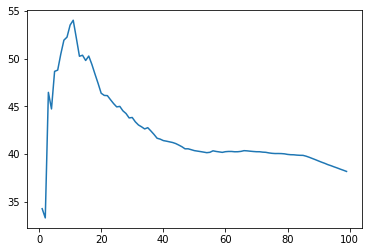

In [4]:
plt.plot(range(1,100),score_list)

20.340440226487328
[20.340440226487328, 30.755347041957727, 32.33561470637528, 30.431402978998936, 33.01956356321399, 33.58681998520909, 33.94068143573874, 30.45564054703138, 30.813270104168947, 30.11030074894474, 29.35347072753753, 31.656348693693356, 33.02839149028206, 34.88524444623345, 35.77424742114616, 34.919197660372106, 33.71431014722374]


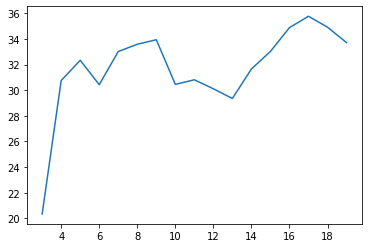

In [5]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"region"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

32.73206465689871
[81.59556322190564, 54.12923987435072, 52.21087716601249, 47.36630547690257, 46.20683120492034, 44.77013048153125, 43.27793239513596, 40.05244364814087, 38.89949880068436, 40.450322541977336, 40.007720555274396, 40.61342383144396, 40.08351465614448, 39.846904887100486, 39.344672182732275, 38.441764086397214, 37.648609802610295, 36.8699943636421, 36.68289701407013, 35.932713268169714, 35.46987774411606, 34.72303295081982, 34.02770189273931, 33.67378023741069, 33.297846026432396, 33.28322554002801, 33.136573508104675, 32.9406135983332, 32.747246494063056, 32.87642622064732, 32.74871389194518, 32.78771908825397, 32.73206465689871, 32.76791995502714, 33.05189729109082, 33.190413552620605, 33.26056570830244, 33.58046897332055, 33.80881399279788, 33.9501440390676, 33.85752482238554, 34.2356280984082, 34.17601473400567, 34.08816478064031, 34.19368037778001, 34.30074904190541, 34.560599970326955, 34.733408186252845, 35.03754354657314, 35.300286914556374, 35.51478652442163, 35

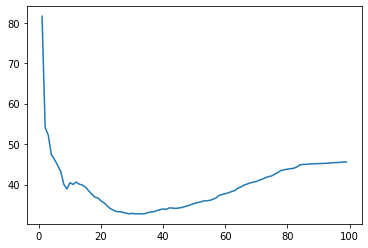

In [6]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k),"time"))

print(min(score_list))
print(score_list)
plt.plot(range(1,100),score_list)

40.10736981162139
[40.10736981162139, 41.51541486512493, 40.284600234805175, 109.59225415538477, 41.713452718393256, 103.47372891456375, 45.444369648307806, 106.09845568344699, 105.45955578925683, 105.83871350060413, 104.81654797837682, 106.36066238733295, 47.93560540584629, 46.68427867066171, 46.94777683767358, 46.94777683767358, 46.94777683767358]


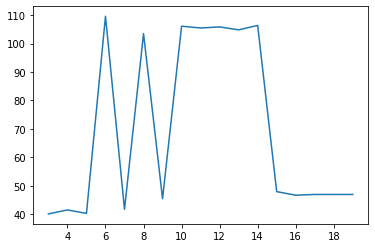

In [7]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"time"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

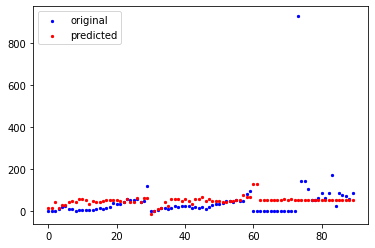

In [12]:
knn = KNN(2)

train, val = split_region(2)
knn.fit(train.iloc[:,3:-1], train.iloc[:,-1])
pred = knn.predict(val.iloc[:,3:-1])

plt.scatter(range(len(val.iloc[:,-1])), val.iloc[:,-1], s=5, color="blue", label="original")
plt.scatter(range(len(val.iloc[:,-1])), pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()